Control and State estimation of unstable system

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [69]:
A = np.matrix('0 1; 2 -1')
B = np.matrix("1; 0")
C = np.matrix("1 0")
D = 0
sys = control.ss(A, B, C, D)  # Creating the state space object
print(A)

[[ 0  1]
 [ 2 -1]]


In order to determine the stability of the system, its eigen values are determined by evaluating the following

$$
det(\mathbf{A} - \lambda\mathbf{I}) =
det \begin{bmatrix}
0 - \lambda & 1 \\
2 & -1 -\lambda
\end{bmatrix}
= 0
$$

$$
(-\lambda)(-1-\lambda) - 2 = 0
$$

$$
 \lambda^2 + \lambda - 2 = 0
$$

$$
\lambda = -2  \vee \lambda = 1
$$

As can be seen, the system has the positive eigen value $\lambda=1$, thus the system has an unstable pole

In [70]:
# Getting eigenvalues with np.linalg
eig = np.linalg.eigvals(A)
print(f"The eigenvalues to the system matrix A is: k_1={eig[0]}, and k_2={eig[1]}")

The eigenvalues to the system matrix A is: k_1=1.0, and k_2=-2.0


Plot the step response and PZ-map of the system

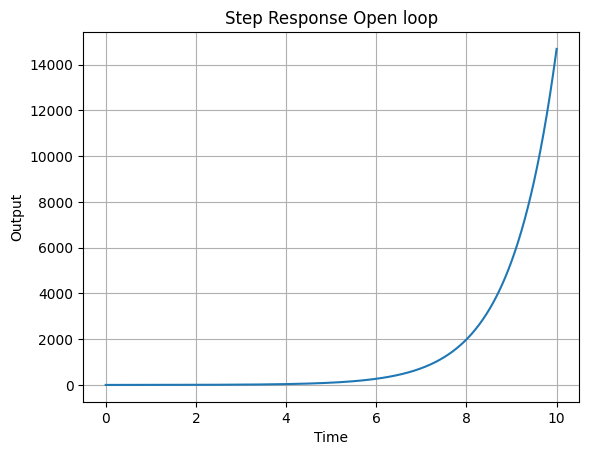

In [71]:
t = np.linspace(0, 10, 1000)
u = np.ones_like(t)

t, y = control.step_response(sys, T=t, X0=[0,0], input=u)

# Plot the response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response Open loop')
plt.grid(True)
plt.show()

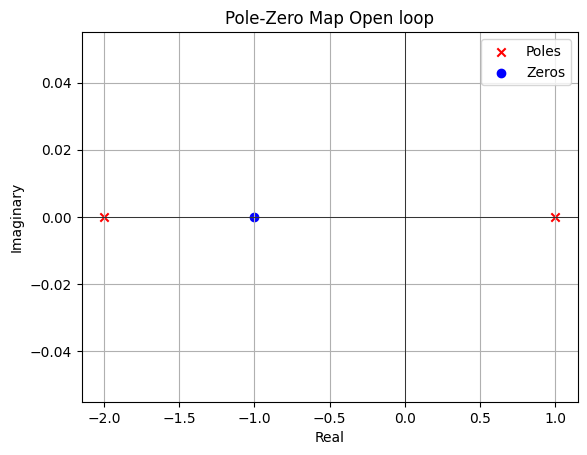

In [72]:
poles = control.poles(sys)
zeros = control.zeros(sys)

plt.figure()
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map Open loop')
plt.legend()
plt.grid(True)
plt.show()

Make the system stable by introducing control in order to move all the system poles to the left plane.
First check that the system is controllable.

In [73]:
# Check system controllability
C_ctrb = control.ctrb(A, B)
C_rank = np.linalg.matrix_rank(C_ctrb)

if C_rank == A.shape[0]:
    print("The system is controllable.")
else:
    print("The system is not controllable.")

The system is controllable.


Now that the system has been verified to be controllable, the poles are placed by utilizing a linear quadratic regulator (LQR)

In [74]:
Q = np.matrix([
    [1, 0],
    [0, 1]
])

R = np.matrix([[1]])  # Must be matrix get error if not, "normal" value works for control.lqr()

# Solve the algebraic Riccati equation
R_ric = control.care(A, B, Q, R)
X = R_ric[0]
#Compute the LQR gain matrix
K = np.linalg.inv(R) @ B.T @ X
print(K)

K, _, _ = control.lqr(A, B, Q, R)  # Just to verify the gain matrix is calculated with the lqr function
print(K)

[[2.46410162 1.26794919]]
[[2.46410162 1.26794919]]


In [75]:
# Check system observability
O_obsv = control.obsv(A, C)
O_rank = np.linalg.matrix_rank(O_obsv)

if O_rank == A.shape[0]:
    print("The system is observable.")
else:
    print("The system is not observable. Cannot design observer.")

The system is observable.
